Problem Statement:

The puzzle game Magnets involves placing a set of domino-shaped magnets (or electrets or other polarized objects) in a subset of slots on a board so as to satisfy a set of constraints. For example, the puzzle on the left has the solution shown on the right:

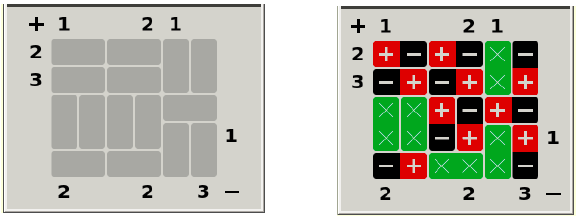

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/Rough work/Others/Backtracking Algorithm/img/magnet.png")

Each slot contains either a blank entry (indicated by ‘x’s), or a “magnet” with a positive and negative end. The numbers along the left and top sides show the numbers of ‘+’ squares in particular rows or columns. Those along the right and bottom show the number of ‘-’ signs in particular rows or columns. Rows and columns without a number at one or both ends are unconstrained as to the number of ‘+’ or ‘-’ signs, depending on which number is not present. In addition to fulfilling these numerical constraints, a puzzle solution must also satisfy the constraint that no two orthogonally touching squares may have the same sign (diagonally joined squares are not constrained). You are given top[], bottom[], left[], right[] arrays indicates the count of + or – along the top(+), bottom(-), left(+) and right(-) edges respectively. Values of -1 indicate any number of + and – signs. Also given matrix rules[][] contain any one T, B, L or R characters. For a vertical slot in the board, T indicates its top end and B indicates the bottom end. For a horizontal slot in the board, L indicates left end and R indicates the right end.

In [1]:
M = 5
N = 6
top = [ 1, -1, -1, 2, 1, -1 ]
bottom = [ 2, -1, -1, 2, -1, 3 ]
left = [ 2, 3, -1, -1, -1 ]
right = [ -1, -1, -1, 1, -1 ]
rules = [["L","R","L","R","T","T" ],
					[ "L","R","L","R","B","B" ],
					[ "T","T","T","T","L","R" ],
					[ "B","B","B","B","T","T" ],
					[ "L","R","L","R","B","B" ]]

def canPutPatternHorizontally(rules,i,j,pat):
	if j-1>=0 and rules[i][j-1] == pat[0]:
		return False
	elif i-1>=0 and rules[i-1][j] == pat[0]:
		return False
	elif i-1>=0 and rules[i-1][j+1] == pat[1]:
		return False
	elif j+2 < len(rules[0]) and rules[i][j+2] == pat[1]:
		return False
	return True
	

def canPutPatternVertically(rules,i,j,pat):
	if j-1>=0 and rules[i][j-1] == pat[0]:
		return False
	elif i-1>=0 and rules[i-1][j] == pat[0]:
		return False
	elif j+1 < len(rules[0]) and rules[i][j+1] == pat[0]:
		return False
	return True
	
def doTheStuff(rules,i,j):
	if rules[i][j] == "L" or rules[i][j] == "R":
		if canPutPatternHorizontally(rules,i,j,"+-"):
			rules[i][j] = "+"
			rules[i][j+1] = "-"
			solveMagnets(rules,i,j)
			
def checkConstraints(rules):
	pCountH = [0 for i in range(len(rules))]
	nCountH = [0 for i in range(len(rules))]
	for row in range(len(rules)):
		for col in range(len(rules[0])):
			ch = rules[row][col]
			if ch == "+":
				pCountH[row] += 1
			elif ch == "-":
				nCountH[row] += 1
	pCountV = [0 for i in range(len(rules[0]))]
	nCountV = [0 for i in range(len(rules[0]))]
	for col in range(len(rules[0])):
		for row in range(len(rules)):
			ch = rules[row][col]
			if ch == "+":
				pCountV[col] += 1
			elif ch == "-":
				nCountV[col] += 1
	
	for row in range(len(rules)):
		if left[row] != -1:
			if pCountH[row] != left[row]:
				return False
		if right[row] != -1:
			if nCountH[row] != right[row]:
				return False
	for col in range(len(rules[0])):
		if top[col] != -1:
			if pCountV[col] != top[col]:
				return False
		if bottom[col] != -1:
			if nCountV[col] != bottom[col]:
				return False
	return True
	
def solveMagnets(rules,i,j):
	if i == len(rules) and j == 0:
		if checkConstraints(rules):
			print(rules)
	elif j >= len(rules[0]):
		solveMagnets(rules,i+1,0)
	else:
		
		if rules[i][j] == "L":
			if canPutPatternHorizontally(rules,i,j,"+-"):
				rules[i][j] = "+"
				rules[i][j+1] = "-"
				solveMagnets(rules,i,j+2)
				rules[i][j] = "L"
				rules[i][j+1] = "R"
			if canPutPatternHorizontally(rules,i,j,"-+"):
				rules[i][j] = "-"
				rules[i][j+1] = "+"
				solveMagnets(rules,i,j+2)
				rules[i][j] = "L"
				rules[i][j+1] = "R"
			if True or canPutPatternHorizontally(rules,i,j,"xx"):
				rules[i][j] = "x"
				rules[i][j+1] = "x"
				solveMagnets(rules,i,j+2)
				rules[i][j] = "L"
				rules[i][j+1] = "R"
		elif rules[i][j] == "T":
			if canPutPatternVertically(rules,i,j,"+-"):
				rules[i][j] = "+"
				rules[i+1][j] = "-"
				solveMagnets(rules,i,j+1)
				rules[i][j] = "T"
				rules[i+1][j] = "B"
			if canPutPatternVertically(rules,i,j,"-+"):
				rules[i][j] = "-"
				rules[i+1][j] = "+"
				solveMagnets(rules,i,j+1)
				rules[i][j] = "T"
				rules[i+1][j] = "B"
			if True or canPutPatternVertically(rules,i,j,"xx"):
				rules[i][j] = "x"
				rules[i+1][j] = "x"
				solveMagnets(rules,i,j+1)
				rules[i][j] = "T"
				rules[i+1][j] = "B"
		else:
			solveMagnets(rules,i,j+1)

solveMagnets(rules,0,0)


[['+', '-', '+', '-', 'x', '-'], ['-', '+', '-', '+', 'x', '+'], ['x', 'x', '+', '-', '+', '-'], ['x', 'x', '-', '+', 'x', '+'], ['-', '+', 'x', 'x', 'x', '-']]
